Clustering Model Reference : https://www.kaggle.com/code/maksimeren/covid-19-literature-clustering

## I. Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

## II. Data Cleaning

- Importing each year's data to be concatenated
- Labeling each year 

In [5]:
df15 = pd.read_csv("2015.csv")
df16 = pd.read_csv("2016.csv")
df17 = pd.read_csv("2017.csv")
df18 = pd.read_csv("2018.csv")
df19 = pd.read_csv("2019.csv")
df21 = pd.read_csv("2021.csv")


In [6]:
df = pd.concat([df15, df16, df17, df18, df19, df21])
# Add to label specific year
df['year'] = pd.concat([
    df15.assign(year=2015),
    df16.assign(year=2016),
    df17.assign(year=2017),
    df18.assign(year=2018),
    df19.assign(year=2019), 
    df21.assign(year=2021)
    ], axis=0)['year']
# Rename City Column
df.rename(columns={'Unnamed: 0': 'City'}, inplace=True)
df

,City,age_pyramid_total_nyc,median_household_income_nyc,median_personal_earnings_nyc,no_hs_nyc,at_least_hs_nyc,complete_hs_somecollege_nyc,complete_bach_nyc,at_least_bachelors_nyc,grad_degree_nyc,...,veterans_poverty_nyc,veterans_poverty_percent_nyc,veterans_poverty_disabled_nyc,veterans_poverty_disabled_percent_nyc,vet_total_nyc_18_64,veterans_unemployed_nyc,veterans_unemployed_percent_nyc,veterans_disabled_nyc,veterans_disabled_percent_nyc,year
0,"New York city, New York",8550405,55752,36087,19.097573,80.902427,44.058038,21.885647,36.844389,14.958742,...,17862,11.379897,7520,4.790999,69775,3139,4.498746,24730,15.755506,2015
0,"New York city, New York",8537673,58856,36871,18.456166,81.543834,44.523201,21.543797,37.020633,15.476836,...,14778,10.027073,6719,4.558932,70710,3362,4.754632,25358,17.205746,2016
0,"New York city, New York",8622698,60879,38430,18.114607,81.885393,44.563906,21.631749,37.321486,15.689738,...,13927,9.233880,4623,3.065142,68674,3958,5.763462,20653,13.693353,2017
0,"New York city, New York",8398748,63799,40932,17.287630,82.712370,43.728064,22.835438,38.984307,16.148868,...,15986,11.129367,6252,4.352609,64621,2537,3.925968,21320,14.842869,2018
0,"New York city, New York",8336817,69407,42326,16.779843,83.220157,44.000053,22.727674,39.220104,16.492430,...,16280,11.789583,7352,5.324141,64353,2559,3.976505,20634,14.942645,2019
0,"New York city, New York",8467513,67997,43133,16.133492,83.866508,42.906229,23.516056,40.960278,17.444222,...,15750,11.808101,5885,4.412106,60375,3588,5.942857,22002,16.495355,2021


# III. Data Exploration 

- Cluster Visualization 

In [9]:
df.shape

(6, 199)

In [10]:
df.columns

Index(['City', 'age_pyramid_total_nyc', 'median_household_income_nyc',
       'median_personal_earnings_nyc', 'no_hs_nyc', 'at_least_hs_nyc',
       'complete_hs_somecollege_nyc', 'complete_bach_nyc',
       'at_least_bachelors_nyc', 'grad_degree_nyc',
       ...
       'veterans_poverty_nyc', 'veterans_poverty_percent_nyc',
       'veterans_poverty_disabled_nyc',
       'veterans_poverty_disabled_percent_nyc', 'vet_total_nyc_18_64',
       'veterans_unemployed_nyc', 'veterans_unemployed_percent_nyc',
       'veterans_disabled_nyc', 'veterans_disabled_percent_nyc', 'year'],
      dtype='object', length=199)

- Correlational Heatmap : Identify pairs of features that are strongly correlated.

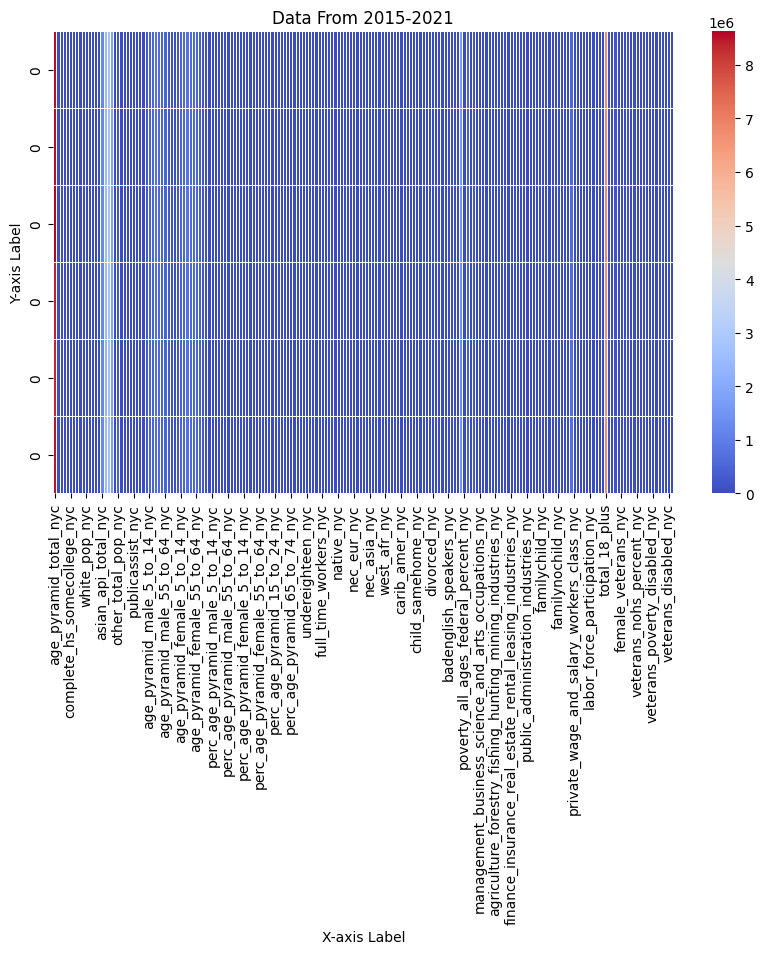

In [14]:
df_for_visual = df.drop(columns=['City', 'year'])
plt.figure(figsize=(10, 6)) # Adjust size if needed
sns.heatmap(df_for_visual, cmap='coolwarm', linewidth=0.5)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Data From 2015-2021')
plt.show()

- Scatter Plot : Create scatter plots to visualize relationships beteen multiple features simultaneously

1. Approach it from clustering within subcategories 

2. Recommend off the bat the variables with the strongest correlation -> challenge : we need different geographic levels to see the correlation - LAST OPTION

3. Looking in within one year how do we recommend another variable by pivoting the table 

4. pivot newest data and make each label a row to add sector identifier 
    - cut out layout 
    - set aside sector, pivot, then join
    - keep variable names and pivot
    